In [ ]:
import jovian
jovian.commit(environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


In [272]:
from yahoo_fin import stock_info as si
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import psutil
from IPython.display import Image
import datetime
from dateutil import parser

In [273]:
SYMBOL = "TSLA"
INTERVAL = '5min'
API_KEY = input()
df = pd.read_csv(f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={SYMBOL}&interval={INTERVAL}&apikey={API_KEY}&datatype=csv')

VJOJOA8WIN0QEPCF


In [274]:
df.head()

,timestamp,open,high,low,close,volume
0,2020-06-19 16:00:00,999.97,1001.44,999.7800,1000.5700,232656
1,2020-06-19 15:55:00,1000.90,1001.65,999.5000,1000.0700,151956
2,2020-06-19 15:50:00,1000.67,1001.00,999.3300,1000.5300,136372
3,2020-06-19 15:45:00,1001.12,1001.49,1000.1000,1000.9759,63073
4,2020-06-19 15:40:00,1001.68,1002.30,999.7117,1000.6800,84025


In [275]:
df = df.sort_values(by='timestamp')

In [276]:
def WMA(data, n):

    ws = np.zeros(data.shape[0])
    t_sum = sum(range(1, n+1))
   
    for i in range(n-1, data.shape[0]):
        ws[i] = sum(data[i-n+1 : i+1] * np.linspace(1, n, n))/ t_sum
        
    return ws

In [277]:
df['WMA5'] = WMA(df['close'], 5)
df['WMA10'] = WMA(df['close'], 10)
df['WMA25'] = WMA(df['close'], 25)
n = 7
df['EWMA'] = df['close'].ewm(ignore_na=False, min_periods=n - 1, span=n).mean()
df['EWMA_MEAN'] = df['EWMA'].ewm(ignore_na=False, min_periods=n- 1,span=n).mean()
df['DEWMA'] = 2 * df['EWMA'] - df['EWMA_MEAN']
nx = 14
df['Momentum'] = df['close'] - df['close'].shift(nx)
df.head()

,timestamp,open,high,low,close,volume,WMA5,WMA10,WMA25,EWMA,EWMA_MEAN,DEWMA,Momentum
99,2020-06-18 14:15:00,999.73,1000.6900,998.01,998.7100,68913,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
98,2020-06-18 14:20:00,998.78,999.6800,997.22,999.0000,77024,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
97,2020-06-18 14:25:00,998.32,999.9999,997.67,998.9064,48925,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
96,2020-06-18 14:30:00,998.75,999.7000,996.72,997.5740,69286,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
95,2020-06-18 14:35:00,997.75,1000.5800,997.00,999.6250,72159,998.790013,0.0,0.0,NaN,NaN,NaN,NaN


In [278]:
df = df.iloc[24:]

In [279]:
df.head()

,timestamp,open,high,low,close,volume,WMA5,WMA10,WMA25,EWMA,EWMA_MEAN,DEWMA,Momentum
75,2020-06-19 09:45:00,1009.98,1013.200,1008.18,1008.8500,186934,1008.141167,1005.519524,1002.236450,1006.045796,1003.138535,1008.953058,11.7000
74,2020-06-19 09:50:00,1009.09,1009.990,1006.01,1007.7635,138424,1008.487500,1006.213771,1002.774982,1006.475465,1003.974756,1008.976174,9.4535
73,2020-06-19 09:55:00,1008.39,1009.681,1006.88,1008.1900,103873,1008.532767,1006.884269,1003.318464,1006.904280,1004.708446,1009.100115,10.5000
72,2020-06-19 10:00:00,1008.44,1009.050,1004.86,1005.5300,136624,1007.413367,1006.953253,1003.629054,1006.560601,1005.172105,1007.949097,6.9100
71,2020-06-19 10:05:00,1005.65,1009.000,1005.65,1008.5500,107422,1007.587800,1007.479067,1004.151572,1007.058069,1005.644070,1008.472069,9.1242


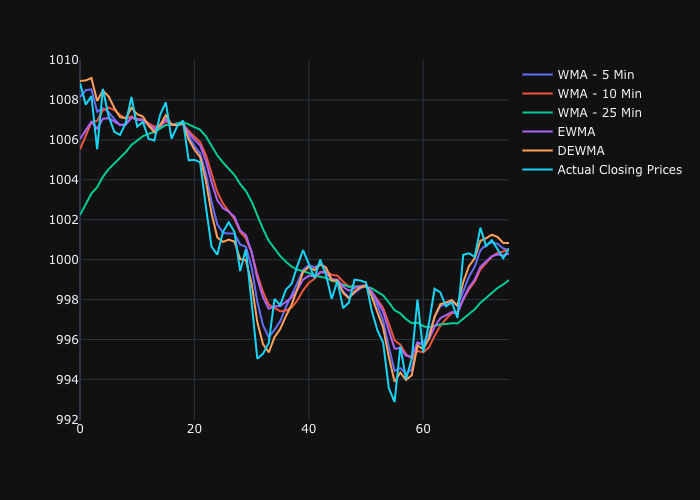

In [280]:
fig = px.line(template='plotly_dark')
fig.add_scatter(y = df['WMA5'], mode='lines', name='WMA - 5 Min')
fig.add_scatter(y = df['WMA10'], mode='lines', name='WMA - 10 Min')
fig.add_scatter(y = df['WMA25'], mode='lines', name='WMA - 25 Min')
fig.add_scatter(y = df['EWMA'], mode='lines', name='EWMA')
fig.add_scatter(y = df['DEWMA'], mode='lines', name='DEWMA')
fig.add_scatter(y = df['close'], mode='lines', name='Actual Closing Prices')
img_bytes = fig.to_image(format='png')
Image(img_bytes)
# fig.show()

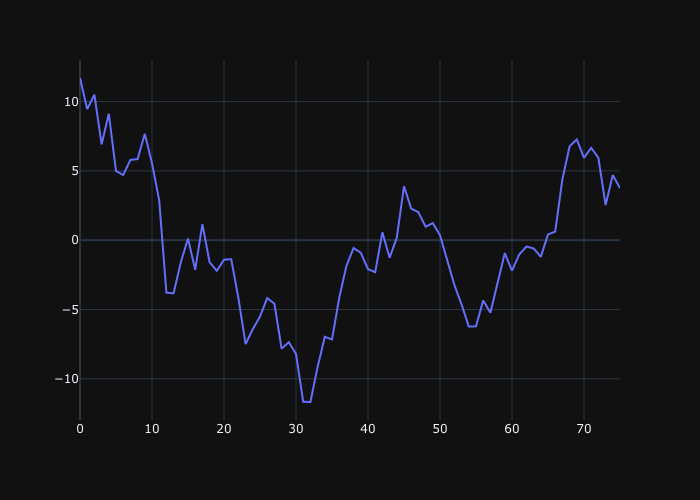

In [281]:
fig = px.line(template='plotly_dark')
fig.add_scatter(y = df['Momentum'], mode='lines', name='Stock Based Momentum')
img_bytes = fig.to_image(format='png')
Image(img_bytes)
# fig.show()

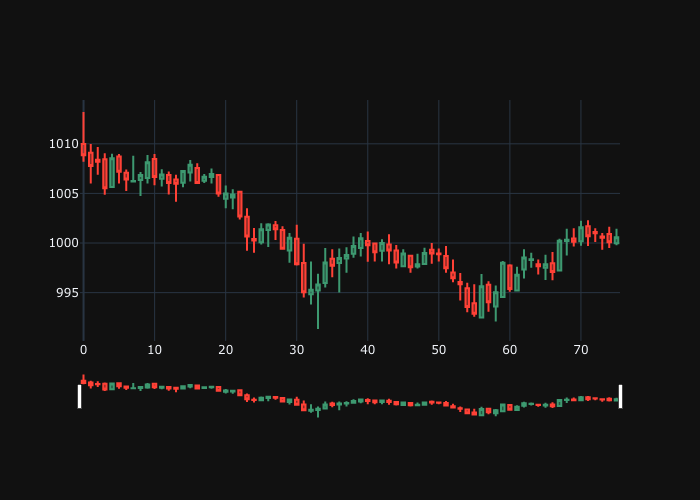

In [282]:
fig = go.Figure(data=[go.Candlestick(
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])
fig.update_layout(template='plotly_dark')
img_bytes = fig.to_image(format='png')
Image(img_bytes)
# fig.show()

https://www.investopedia.com/trading/candlestick-charting-what-is-it/